# 데이터 불러오기

In [154]:
import pandas as pd

#데이터 불러오기
df = pd.read_csv("diabetes.csv")

# Exploratory Data Analysis (EDA)

## 데이터 상위 5개 행 확인

In [155]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 각 Feature의 의미

- **Pregnancies**: 임신 횟수
- **Glucose**: 혈당 수치
- **BloodPressure**: 혈압 측정값
- **SkinThickness**: 피부 두께
- **Insulin**: 혈액 내 인슐린 수치
- **BMI**: 체질량지수
- **DiabetesPedigreeFunction**: 당뇨병 확률
- **Age**: 나이
- **Outcome**: 최종 결과 (1은 "예", 0은 "아니오"를 의미함)

## 데이터 사이즈 확인

In [156]:
df.shape

(768, 9)

## Null 데이터 및 데이터 타입 확인

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [158]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [159]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [160]:
import numpy as np


# 비정상 값(0)을 결측치(NaN)로 대체
# Glucose, BloodPressure, SkinThickness, Insulin, BMI 열에서 0값을 결측치로 간주
columns_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zero_as_missing] = df[columns_with_zero_as_missing].replace(0, np.nan)

# 결측치 비율 확인
missing_values_percentage = df.isnull().mean() * 100
print("결측치 비율:")
print(missing_values_percentage)

# 결측치 대체
# 결측치를 해당 열의 중앙값으로 대체
df.fillna(df.median(), inplace=True)


결측치 비율:
Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


## 데이터 시각화

## heatmap을 통해 feature 간 상관관계 파악

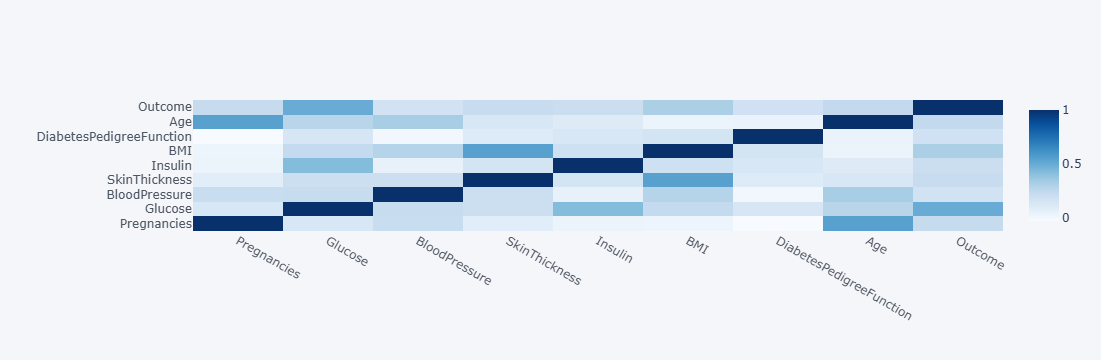

In [161]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

df.corr(numeric_only=True).iplot(kind="heatmap", colorscale="Blues")

## 특정 feature와 Outcome과의 관계 분석(시각화)

In [162]:
def bin_numeric_columns(df, bins):
    """
    숫자형 컬럼을 주어진 구간(bins)으로 나누는 함수
    """
    # 데이터프레임 복사
    binned_df = df.copy()
    
    # 숫자형 컬럼만 선택
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    # Outcome 컬럼 제외
    numeric_columns = [x for x in numeric_columns if x != "Outcome"]

    for col in numeric_columns:
        # 각 컬럼에 대한 구간 경계값 계산
        bin_edges = pd.cut(df[col], bins=bins, retbins=True)[1]
        
        # 구간 경계값을 기반으로 레이블 생성
        labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges) - 1)]
        
        # 컬럼 데이터를 구간화하고 레이블 적용 (중복 허용)
        binned_df[col] = pd.cut(df[col], bins=bin_edges, labels=labels, include_lowest=True, ordered=False)

    return binned_df

# 데이터셋에 함수 적용
binned_df = bin_numeric_columns(df, bins=15)

# 구간화된 데이터셋 출력
binned_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5-6,147-157,69-76,31-37,124-180,31-34,0-0,49-53,1
1,0-1,75-85,63-69,25-31,124-180,24-27,0-0,29-33,0
2,7-9,178-188,63-69,25-31,124-180,21-24,0-0,29-33,1
3,0-1,85-95,63-69,19-25,69-124,27-31,0-0,20-25,0
4,0-1,126-137,37-43,31-37,124-180,41-44,2-2,29-33,1
...,...,...,...,...,...,...,...,...,...
763,9-10,95-106,69-76,43-49,124-180,31-34,0-0,61-65,0
764,1-2,116-126,69-76,25-31,124-180,34-37,0-0,25-29,0
765,4-5,116-126,69-76,19-25,69-124,24-27,0-0,29-33,0
766,0-1,116-126,56-63,25-31,124-180,27-31,0-0,45-49,1


In [163]:
def create_feature_outcome_dataframe(feature):
    """
    Outcome(결과)에 따라 특정 feature의 분포를 보여주는 데이터프레임 생성
    """
    # 유효한 Outcome 값(0과 1)을 가진 행 필터링
    valid_outcomes = [1, 0]
    filtered_train = binned_df[binned_df["Outcome"].isin(valid_outcomes)]
    
    # Outcome에 따라 생존(Survived)과 사망(Dead)으로 데이터 분리
    survive_condition = filtered_train[filtered_train["Outcome"] == 1]
    dead_condition = filtered_train[filtered_train["Outcome"] == 0]

    # 각 조건에서 해당 특성의 값 개수 계산
    survive = survive_condition[feature].value_counts()
    dead = dead_condition[feature].value_counts()

    # 계산된 값을 데이터프레임으로 변환
    df = pd.DataFrame({
        "Survived": survive,  # 생존 빈도
        "Dead": dead          # 사망 빈도
    }).fillna(0).astype(int)  # NaN 값을 0으로 대체하고 정수형으로 변환

    return df

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_feature_outcome(df, feature_name):
    """
    Outcome(결과)에 따른 특성의 분포를 막대그래프로 시각화
    """
    # 시각화를 위해 데이터프레임을 전치(Transpose)
    df_t = df.T

    # 그래프 스타일 설정
    sns.set(style="whitegrid")

    # 막대 그래프 생성
    plt.figure(figsize=(10, 6))
    df_t.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Distribution of {feature_name} by Outcome")  # 그래프 제목 설정
    plt.xlabel(feature_name)  # X축 레이블 설정
    plt.ylabel("Count")       # Y축 레이블 설정
    plt.xticks(rotation=0)    # X축 눈금 회전 설정

    # 그래프 출력
    plt.tight_layout()
    plt.show()

<Figure size 1000x600 with 0 Axes>

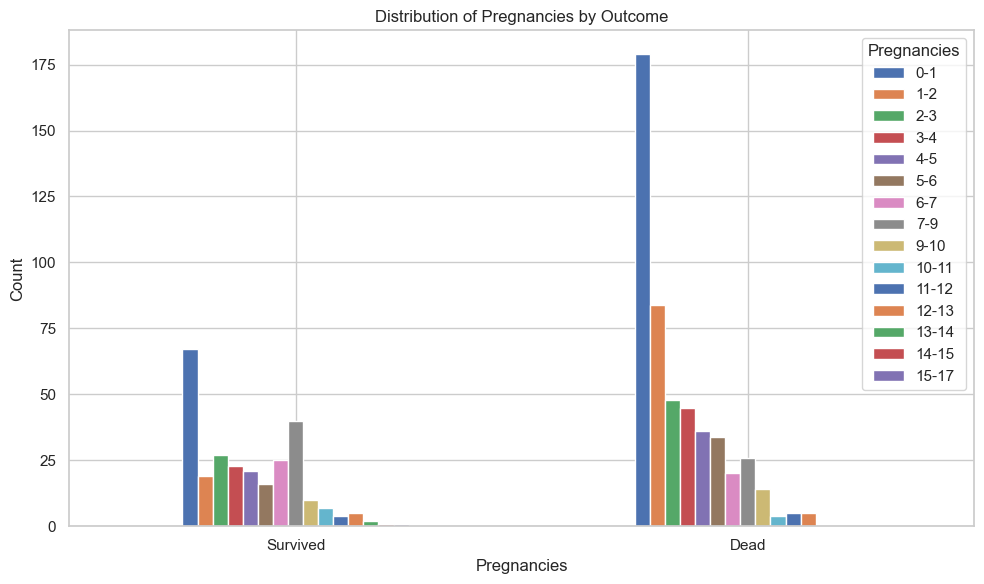

<Figure size 1000x600 with 0 Axes>

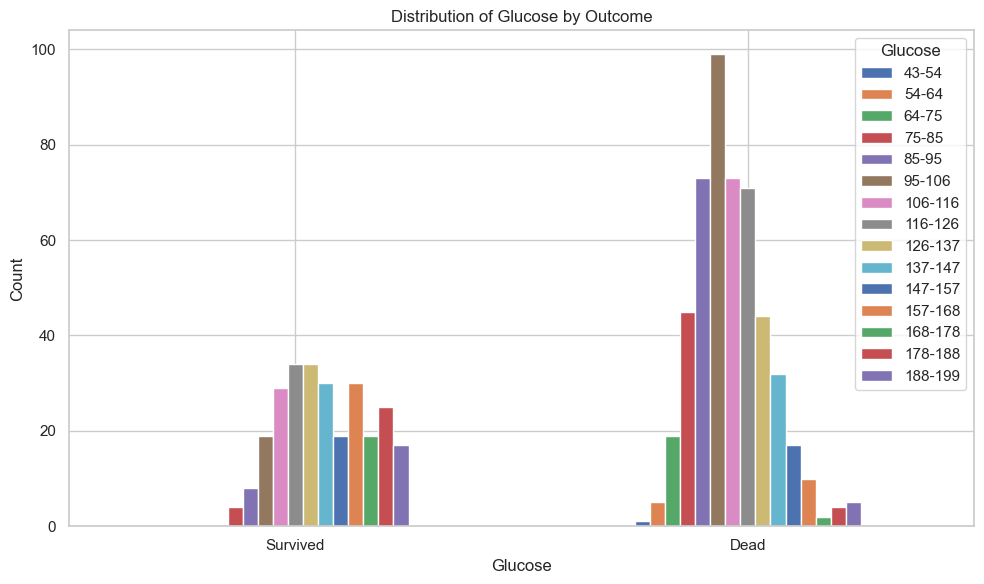

<Figure size 1000x600 with 0 Axes>

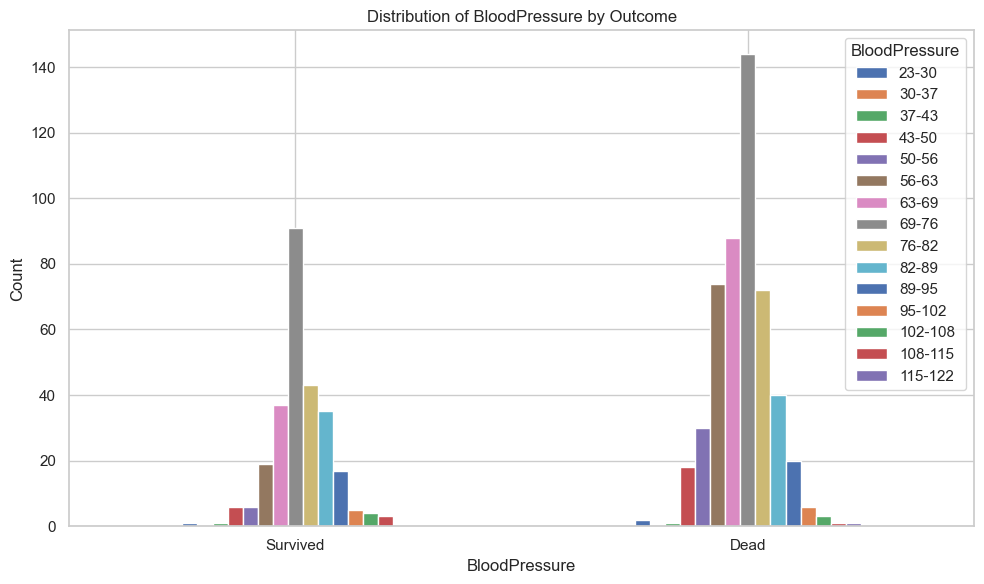

<Figure size 1000x600 with 0 Axes>

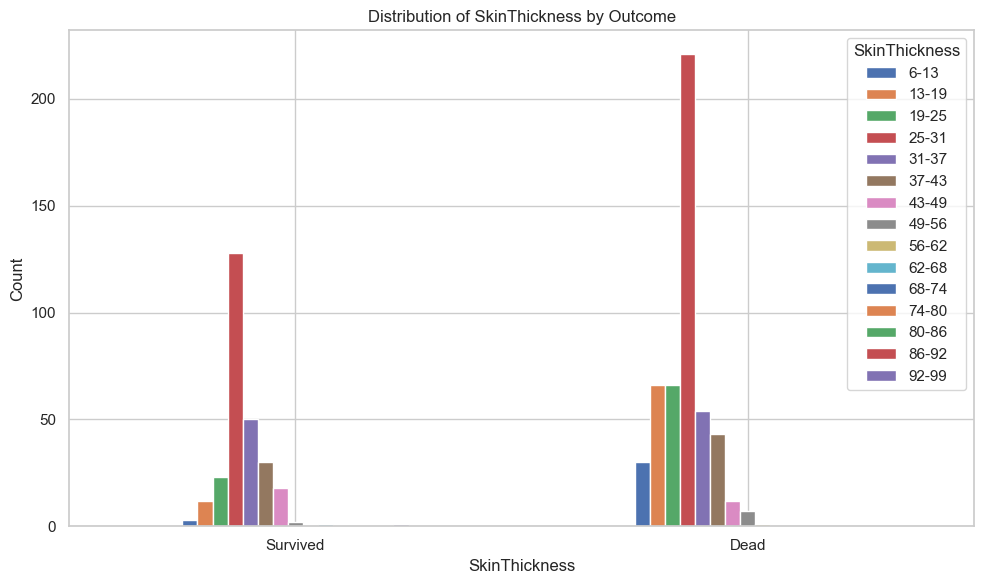

<Figure size 1000x600 with 0 Axes>

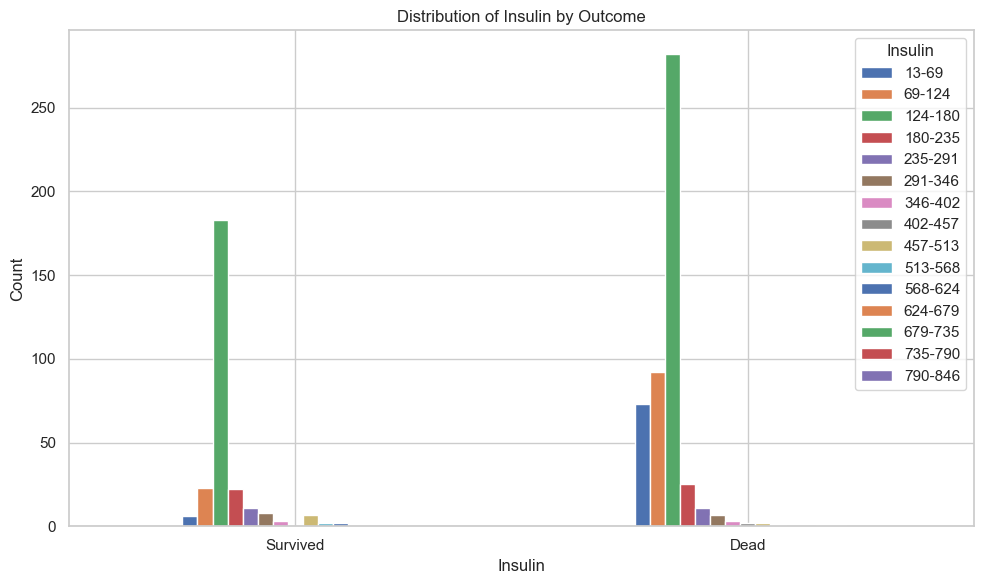

<Figure size 1000x600 with 0 Axes>

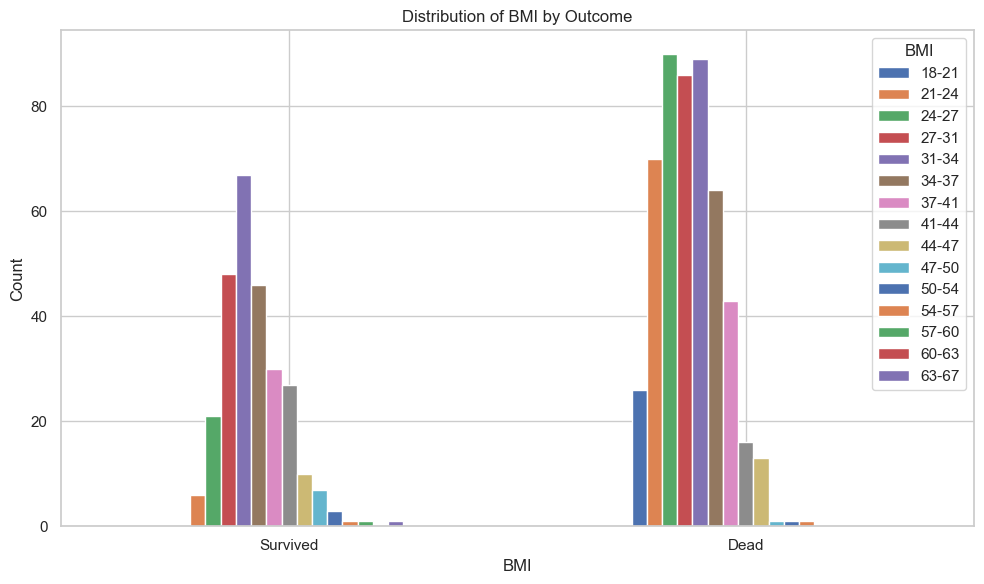

<Figure size 1000x600 with 0 Axes>

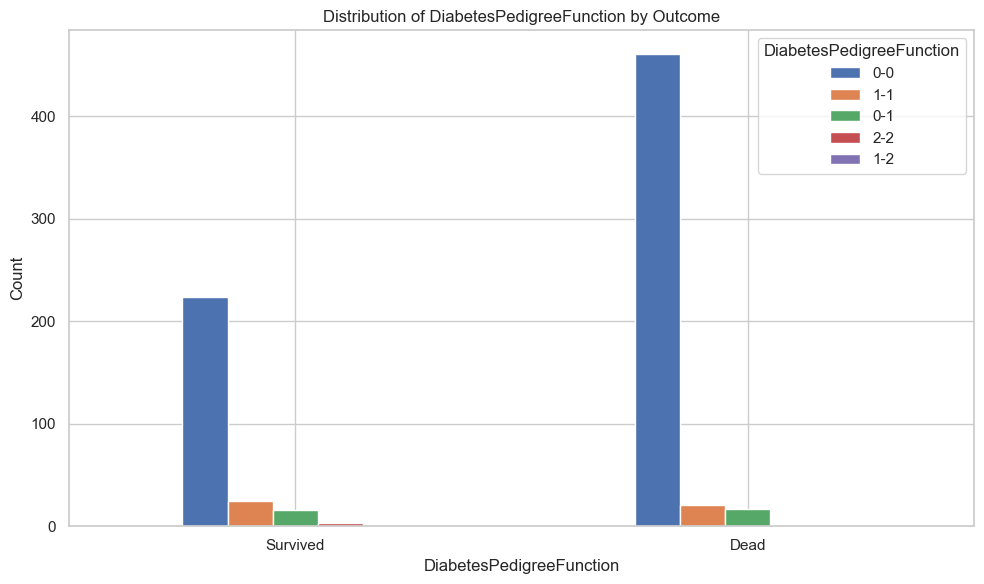

<Figure size 1000x600 with 0 Axes>

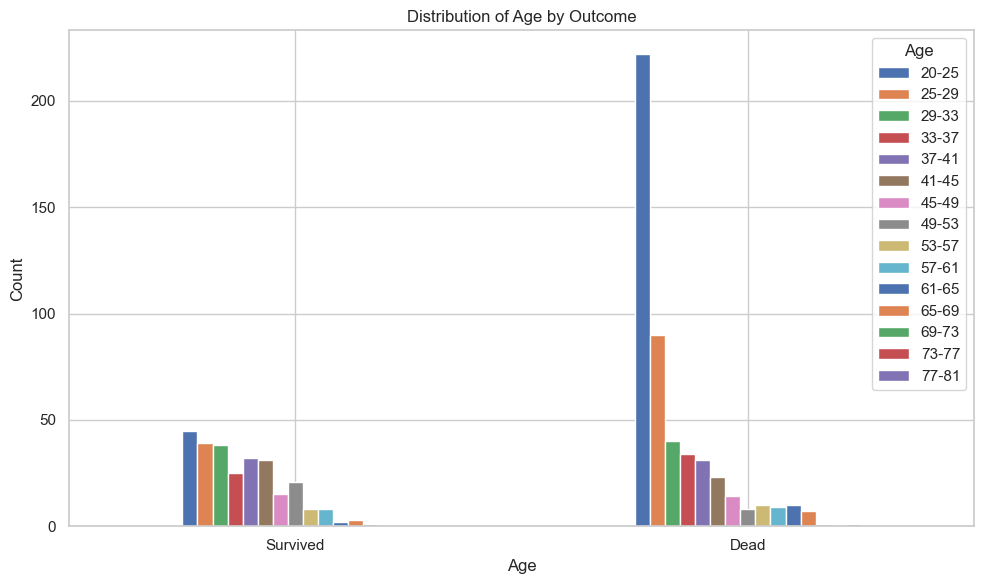

In [165]:
# 각 특성의 분포를 시각화하기 위해 함수 적용
feature_list = [x for x in binned_df.columns if x != "Outcome"]

for feature in feature_list:
    df_feature_outcome = create_feature_outcome_dataframe(feature)
    visualize_feature_outcome(df_feature_outcome, feature)

# Key Insights from Data Analysis

## Pregnancies
- **Survived (Outcome=1):** 1-3회 임신 구간에서 생존율이 높게 나타남.
- **Dead (Outcome=0):** 8-10회 임신 구간에서 사망률이 높음.
- **Meaning:** 적정 임신 횟수가 건강에 긍정적 영향을 미칠 수 있으며, 다산은 부정적 요인이 될 수 있음.

## Glucose
- **Survived:** 99-119mg/dL 구간에서 생존율이 높음.
- **Dead:** 159-179mg/dL 이상의 고혈당 구간에서 사망률이 높음.
- **Meaning:** 적정 혈당 유지가 당뇨 위험 감소와 생존율 향상에 중요.

## BloodPressure
- **Survived:** 73-85mmHg 구간에서 생존율이 높음.
- **Dead:** 고혈압 또는 저혈압 구간에서 사망률이 높음.
- **Meaning:** 혈압 조절 실패는 당뇨와 관련된 부정적 영향을 시사.

## SkinThickness
- **Survived:** 18-25mm 구간에서 생존율이 높음.
- **Dead:** 비정상적인 두께(0-6mm 또는 매우 높음)에서 사망률이 증가.
- **Meaning:** 피하지방 두께는 대사 건강과 밀접한 연관이 있음.

## Insulin
- **Survived:** 84-169pmol/L 구간에서 생존율이 높음.
- **Dead:** 낮은 인슐린 농도(0-84pmol/L)에서 사망률이 높음.
- **Meaning:** 인슐린 농도 조절은 생존율 향상에 긍정적 영향을 미칠 수 있음.

## BMI
- **Survived:** 26-33 구간에서 생존율이 높음.
- **Dead:** 40-46 구간에서 사망률이 높음.
- **Meaning:** 정상 BMI 유지는 생존율 증가와 밀접한 관련이 있음.

## DiabetesPedigreeFunction
- **Survived:** 낮은 가계 병력 지수(0-0)에서 생존율이 높음.
- **Dead:** 높은 병력 지수(1-1)에서 사망률이 높음.
- **Meaning:** 가족력은 당뇨 발생 위험을 증가시킬 가능성이 큼.

## Age
- **Survived:** 30-45세 구간에서 생존율이 높음.
- **Dead:** 60세 이상에서 사망률이 높음.
- **Meaning:** 중년기 건강 관리가 중요하며, 고령은 부정적 요인으로 작용.


# Feature Engineering

## 원핫 인코딩

In [166]:
from sklearn.preprocessing import OneHotEncoder

# Outcome 컬럼 제외한 데이터프레임 생성
df_onehot = binned_df.drop(columns=["Outcome"])


# Outcome 값만 따로 저장
df_y = binned_df[["Outcome"]]

# 원핫 인코딩 대상 컬럼 정의
onehot_cols = [col for col in binned_df.columns if col != "Outcome"]

# 원핫 인코딩 수행
df_onehot = pd.get_dummies(df_onehot, columns=onehot_cols)

In [167]:
# 데이터 분할
ntrain = 614
X_train, X_test = df_onehot[:ntrain], df_onehot[ntrain:]
y_train = df_y[:ntrain].values.ravel()  # 1차원 배열로 변환

# 트리 관련 모델 디폴트 테스트

In [168]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# 모델 정의
random_model = RandomForestClassifier()
extra_model = ExtraTreesClassifier()
gbm_model = GradientBoostingClassifier()

# KFold 정의
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# 모델 테스트 함수
def model_test(model):
    model = model.fit(X_train, y_train)
    score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='accuracy')
    return np.mean(score) * 100

# 모델 성능 비교
tree_models = [random_model, extra_model, gbm_model]

for model in tree_models:
    result = model_test(model)
    print(f"{type(model).__name__} 성능: {result:.2f}%")

RandomForestClassifier 성능: 74.12%
ExtraTreesClassifier 성능: 75.75%
GradientBoostingClassifier 성능: 73.29%


# 트리 관련 모델 중요도 측정

In [169]:
# 모델별 특성 중요도 출력
for model in tree_models:
    print(f"\n{model.__class__.__name__}:")
    try:
        # 특성 중요도 출력
        importances = model.feature_importances_
        print(f"Feature Importances: {importances}")
        # 최대 중요도 특성과 값 출력
        max_importance = np.max(importances)
        max_feature_idx = np.argmax(importances)
        print(f"Max Importance: {max_importance:.4f} (Feature Index: {max_feature_idx})")
    except AttributeError as e:
        # feature_importances_ 속성이 없는 경우
        print("Feature importances not available.")
        print(f"Error: {e}")


RandomForestClassifier:
Feature Importances: [0.02059305 0.01211188 0.01502016 0.01145949 0.01242002 0.01208454
 0.01381823 0.01692729 0.00587372 0.00258746 0.0041506  0.0029595
 0.00167862 0.00045624 0.00038307 0.00018002 0.00263125 0.00539896
 0.01655704 0.01678577 0.02558307 0.01802889 0.01727078 0.01900556
 0.01788527 0.00986975 0.02826273 0.02470721 0.02859722 0.01373642
 0.00127854 0.         0.00020622 0.00452807 0.00585968 0.00952972
 0.01564156 0.02370811 0.01598009 0.01483654 0.00937534 0.00470177
 0.00203253 0.00168143 0.         0.00443189 0.01049518 0.01033638
 0.02044746 0.01764422 0.01522773 0.00865862 0.00314909 0.0003182
 0.00065676 0.         0.         0.         0.         0.00088898
 0.0191975  0.01484364 0.018539   0.01129265 0.00692228 0.00524149
 0.00193145 0.0001144  0.00270665 0.00094961 0.00100076 0.
 0.0008321  0.00069143 0.0005982  0.00685954 0.02181921 0.02189224
 0.01748255 0.02124707 0.01751103 0.01307684 0.01463802 0.00543913
 0.00560038 0.0035189  0.0

In [170]:
# 각 모델의 중요도를 데이터프레임으로 변환
random_model_importance = pd.DataFrame({'Feature': X_train.columns, 'random_model': random_model.feature_importances_})
extra_model_importance = pd.DataFrame({'Feature': X_train.columns, 'extra_model': extra_model.feature_importances_})
gbm_model_importance = pd.DataFrame({'Feature': X_train.columns, 'gbm_model': gbm_model.feature_importances_})

# 각 데이터프레임을 순차적으로 병합
importances = pd.merge(random_model_importance, extra_model_importance, on='Feature')
importances = pd.merge(importances, gbm_model_importance, on='Feature')

# 숫자형 컬럼 선택 후 평균 계산
numeric_columns = [col for col in importances.columns if col != 'Feature']
importances['avg'] = importances[numeric_columns].mean(axis=1)

# 최종 데이터프레임 구성
importances = importances[['Feature', 'avg']].sort_values(by='avg', ascending=False)
importances

,Feature,avg
95,Age_20-25,0.063163
28,Glucose_178-188,0.046693
26,Glucose_157-168,0.040984
27,Glucose_168-178,0.039842
76,BMI_21-24,0.036684
...,...,...
58,SkinThickness_86-92,0.000000
57,SkinThickness_80-86,0.000000
88,BMI_60-63,0.000000
93,DiabetesPedigreeFunction_1-2,0.000000


In [171]:
#중요도가 높은 feature만 선택
importances = importances[:60]

In [172]:
train_importance = X_train[list(importances['Feature'])]
test_importance = X_test[list(importances['Feature'])]

In [173]:
train_importance.head()

,Age_20-25,Glucose_178-188,Glucose_157-168,Glucose_168-178,BMI_21-24,Glucose_95-106,BMI_24-27,Insulin_13-69,Glucose_188-199,Glucose_75-85,...,SkinThickness_19-25,Glucose_64-75,Pregnancies_9-10,Age_49-53,BloodPressure_56-63,Age_45-49,BloodPressure_89-95,Insulin_235-291,BMI_47-50,DiabetesPedigreeFunction_1-1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 중요도가 높은 feature로 다시 머신러닝 적용

In [174]:
# 모델 테스트 함수
def model_test(model):
    model = model.fit(train_importance, y_train)
    score = cross_val_score(model, train_importance, y_train, cv=k_fold, scoring='accuracy')
    return np.mean(score) * 100

# 모델 성능 비교
tree_models = [random_model, extra_model, gbm_model]

for model in tree_models:
    result = model_test(model)
    print(f"{type(model).__name__} 성능: {result:.2f}%")


RandomForestClassifier 성능: 74.93%
ExtraTreesClassifier 성능: 75.59%
GradientBoostingClassifier 성능: 73.45%


# RandomizedSearchCV 및 GridSearchCV 탐색

In [175]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint

#데이터 준비
X_train = train_importance
X_test = test_importance

ntrain = 614
y_train = df_y[:ntrain].values.ravel()  # 1차원 배열로 변환
y_test = df_y[ntrain:].values.ravel()  # 1차원 배열로 변환

# 교차 검증 설정
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [176]:
# Random Forest 모델
rf_model = RandomForestClassifier(random_state=42)

# 하이퍼파라미터 범위 정의
rf_param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# Randomized Search 실행
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_distributions,
    n_iter=50,  # 시도할 조합 개수
    cv=cv,  # 교차 검증
    scoring='accuracy',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# 모델 훈련
rf_random_search.fit(X_train, y_train)

print("Best parameters:", rf_random_search.best_params_)
print("Best accuracy:", rf_random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 354}
Best accuracy: 0.7589497534319606


In [177]:
# Extra Trees 모델
et_model = ExtraTreesClassifier(random_state=42)

# 하이퍼파라미터 범위 정의
et_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Grid Search 실행
et_grid_search = GridSearchCV(
    estimator=et_model,
    param_grid=et_param_grid,
    cv=cv,  # 교차 검증
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# 모델 훈련
et_grid_search.fit(X_train, y_train)

print("Best parameters:", et_grid_search.best_params_)
print("Best accuracy:", et_grid_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy: 0.7622684259629481


In [178]:
# Gradient Boosting 모델
gb_model = GradientBoostingClassifier(random_state=42)

# 하이퍼파라미터 범위 정의
gb_param_distributions = {
    'n_estimators': randint(100, 500),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Randomized Search 실행
gb_random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_param_distributions,
    n_iter=50,  # 시도할 조합 개수
    cv=cv,  # 교차 검증
    scoring='accuracy',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# 모델 훈련
gb_random_search.fit(X_train, y_train)

print("Best parameters:", gb_random_search.best_params_)
print("Best accuracy:", gb_random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 443, 'subsample': 0.6}
Best accuracy: 0.7606157536985206


In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 최적 모델 성능 평가
print("\n최적 모델 성능 평가")
rf_best_model = rf_random_search.best_estimator_
et_best_model = et_grid_search.best_estimator_
gbm_best_model = gb_random_search.best_estimator_

# Random Forest 성능
rf_accuracy = accuracy_score(y_test, rf_best_model.predict(X_test))
rf_precision = precision_score(y_test, rf_best_model.predict(X_test), average='weighted')
rf_recall = recall_score(y_test, rf_best_model.predict(X_test), average='weighted')
rf_f1 = f1_score(y_test, rf_best_model.predict(X_test), average='weighted')

# Extra Trees 성능
et_accuracy = accuracy_score(y_test, et_best_model.predict(X_test))
et_precision = precision_score(y_test, et_best_model.predict(X_test), average='weighted')
et_recall = recall_score(y_test, et_best_model.predict(X_test), average='weighted')
et_f1 = f1_score(y_test, et_best_model.predict(X_test), average='weighted')

# Gradient Boosting 성능
gbm_accuracy = accuracy_score(y_test, gbm_best_model.predict(X_test))
gbm_precision = precision_score(y_test, gbm_best_model.predict(X_test), average='weighted')
gbm_recall = recall_score(y_test, gbm_best_model.predict(X_test), average='weighted')
gbm_f1 = f1_score(y_test, gbm_best_model.predict(X_test), average='weighted')

# 성능 출력
print("\nRandom Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")

print("\nExtra Trees Performance:")
print(f"Accuracy: {et_accuracy:.4f}")
print(f"Precision: {et_precision:.4f}")
print(f"Recall: {et_recall:.4f}")
print(f"F1-Score: {et_f1:.4f}")

print("\nGradient Boosting Performance:")
print(f"Accuracy: {gbm_accuracy:.4f}")
print(f"Precision: {gbm_precision:.4f}")
print(f"Recall: {gbm_recall:.4f}")
print(f"F1-Score: {gbm_f1:.4f}")


최적 모델 성능 평가

Random Forest Performance:
Accuracy: 0.7403
Precision: 0.7331
Recall: 0.7403
F1-Score: 0.7318

Extra Trees Performance:
Accuracy: 0.7468
Precision: 0.7403
Recall: 0.7468
F1-Score: 0.7393

Gradient Boosting Performance:
Accuracy: 0.7338
Precision: 0.7260
Recall: 0.7338
F1-Score: 0.7241


# 최적 모델 성능 평가

## 주요 분석

1. **모델별 성능 순위 (Accuracy 기준)**
   - **1위:** Extra Trees (Accuracy: 0.7468)
   - **2위:** Random Forest (Accuracy: 0.7403)
   - **3위:** Gradient Boosting (Accuracy: 0.7338)

2. **정확도(Accuracy)**
   - Extra Trees가 가장 높은 정확도를 기록하여 전반적인 예측 성능이 우수함

3. **정밀도(Precision)**
   - Extra Trees(0.7403)가 False Positive를 효과적으로 줄였음을 나타냄
   - Gradient Boosting(0.7260)은 Precision이 가장 낮아 오탐에 더 취약

4. **재현율(Recall)**
   - Extra Trees(0.7468)는 True Positive를 잘 잡아냈음을 보여줌
   - Gradient Boosting은 Recall(0.7338)이 가장 낮음

5. **F1-Score**
   - Extra Trees(0.7393)가 Precision과 Recall 간의 균형이 가장 우수

## 최종 결론
- Extra Trees가 모든 지표에서 가장 우수하거나 근소한 차이로 우위를 보임

# Voting(Hard, Soft)

In [188]:
from sklearn.ensemble import VotingClassifier

# 최적화된 모델 준비
rf_best_model = rf_random_search.best_estimator_  # RandomForest 최적 모델
et_best_model = et_grid_search.best_estimator_  # ExtraTrees 최적 모델
gbm_best_model = gb_random_search.best_estimator_  # GradientBoosting 최적 모델

In [189]:
# Hard Voting
print("Hard Voting 시작")
voting_clf_hard = VotingClassifier(
    estimators=[
        ('RandomForest', rf_best_model),
        ('ExtraTrees', et_best_model),
        ('GradientBoosting', gbm_best_model)
    ],
    voting='hard'  # Hard Voting: 다수결 방식
)

voting_clf_hard.fit(X_train, y_train)  # 학습
hard_predictions = voting_clf_hard.predict(X_test)  # 예측
hard_accuracy = accuracy_score(y_test, hard_predictions)  # 정확도 계산

print(f"Hard Voting Classifier Accuracy: {hard_accuracy:.4f}")


Hard Voting 시작
Hard Voting Classifier Accuracy: 0.7403


In [190]:
# Soft Voting
print("\nSoft Voting 시작")
voting_clf_soft = VotingClassifier(
    estimators=[
        ('RandomForest', rf_best_model),
        ('ExtraTrees', et_best_model),
        ('GradientBoosting', gbm_best_model)
    ],
    voting='soft'  # Soft Voting: 확률 평균 방식
)

voting_clf_soft.fit(X_train, y_train)  # 학습
soft_predictions = voting_clf_soft.predict(X_test)  # 예측
soft_accuracy = accuracy_score(y_test, soft_predictions)  # 정확도 계산

print(f"Soft Voting Classifier Accuracy: {soft_accuracy:.4f}")


Soft Voting 시작
Soft Voting Classifier Accuracy: 0.7468


In [191]:
# Hard Voting & Soft Voting 성능 평가
print("\nHard Voting & Soft Voting 성능 평가")
hard_accuracy = accuracy_score(y_test, hard_predictions)
soft_accuracy = accuracy_score(y_test, soft_predictions)

hard_precision = precision_score(y_test, hard_predictions, average='weighted')
soft_precision = precision_score(y_test, soft_predictions, average='weighted')

hard_recall = recall_score(y_test, hard_predictions, average='weighted')
soft_recall = recall_score(y_test, soft_predictions, average='weighted')

hard_f1 = f1_score(y_test, hard_predictions, average='weighted')
soft_f1 = f1_score(y_test, soft_predictions, average='weighted')

print("\nVoting 비교:")
print(f"Hard Voting - Accuracy: {hard_accuracy:.4f}, Precision: {hard_precision:.4f}, Recall: {hard_recall:.4f}, F1-Score: {hard_f1:.4f}")
print(f"Soft Voting - Accuracy: {soft_accuracy:.4f}, Precision: {soft_precision:.4f}, Recall: {soft_recall:.4f}, F1-Score: {soft_f1:.4f}")



Hard Voting & Soft Voting 성능 평가

Voting 비교:
Hard Voting - Accuracy: 0.7403, Precision: 0.7331, Recall: 0.7403, F1-Score: 0.7318
Soft Voting - Accuracy: 0.7468, Precision: 0.7406, Recall: 0.7468, F1-Score: 0.7357


# Hard Voting & Soft Voting 성능 비교

## 주요 분석
1. **Accuracy**
   - Soft Voting의 Accuracy가 0.7468로 Hard Voting(0.7403)보다 약간 높게 나타남
   - 이는 Soft Voting이 더 많은 정보(예측 확률)를 활용하기 때문에 모델의 전반적인 예측 성능에서 우위를 보였음을 의미

2. **Precision**
   - Precision은 Soft Voting(0.7406)이 Hard Voting(0.7331)보다 더 높음
   - 이는 Soft Voting이 Positive 예측 중 실제로 Positive인 비율이 약간 더 높음을 나타냄

3. **Recall**
   - Recall도 Soft Voting(0.7468)이 Hard Voting(0.7403)보다 높은 성능을 기록
   - Soft Voting이 더 많은 Positive 샘플을 정확히 예측했음을 보여줌

4. **F1-Score**
   - Hard Voting의 F1-Score는 0.7318, Soft Voting은 0.7357로 약간 높은 결과를 보임
   - Precision과 Recall의 균형 면에서도 Soft Voting이 더 나은 성능을 제공

## 최종 결론
- **Soft Voting**은 모든 성능 지표에서 **Hard Voting**보다 일관되게 높은 점수를 기록
- 특히 Accuracy와 Recall에서 눈에 띄는 향상을 보였으며, 이는 Soft Voting이 모델의 예측 확률을 활용하여 보다 정교한 의사 결정을 내릴 수 있음을 시사
- 최종적으로 **Soft Voting**을 사용하는 것이 더 효과적일 가능성이 높음